In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

In [2]:
N = 1000; Ne = int( 0.8*N ); Ni = int( 0.2*N );

T = 4; # total time we want to simulate, 4 s
dt = 0.001; # 1 ms temporal resolution

time = np.linspace(dt,T, int(T/dt)) # time in ms

In [3]:
# decide which 20% neurons are inhibitory
inhibitory_indx = np.sort(np.random.choice(range(N),Ni,replace=False))
inhibitory_indx

array([  1,   3,   8,  12,  13,  15,  24,  25,  36,  43,  45,  46,  53,
        56,  58,  66,  76,  81, 103, 114, 121, 123, 128, 134, 137, 138,
       147, 148, 154, 159, 171, 180, 181, 183, 184, 192, 193, 194, 200,
       203, 205, 216, 222, 223, 224, 236, 243, 260, 266, 270, 273, 282,
       284, 286, 287, 293, 297, 298, 299, 315, 328, 338, 339, 346, 355,
       356, 364, 367, 368, 369, 377, 382, 385, 390, 391, 392, 394, 405,
       410, 411, 413, 418, 427, 433, 434, 438, 442, 475, 476, 485, 486,
       488, 489, 498, 502, 507, 509, 516, 534, 535, 536, 541, 549, 562,
       564, 569, 581, 585, 602, 603, 609, 615, 633, 641, 645, 654, 660,
       663, 664, 667, 669, 670, 671, 673, 675, 682, 689, 690, 692, 694,
       697, 698, 704, 710, 712, 718, 719, 725, 740, 747, 750, 751, 755,
       763, 766, 772, 773, 775, 780, 786, 798, 814, 815, 819, 820, 825,
       826, 831, 837, 838, 839, 854, 859, 865, 873, 878, 880, 881, 885,
       889, 891, 893, 897, 900, 901, 907, 911, 913, 914, 915, 91

In [4]:
J0 = 0.3; J1 = 0.015; J2 = 0.02; l = 0.15
sigma = 1.8

x0 = time/T
I0 = 1.02
lambda_e = 0.03
lambda_i = 0.02
Vres = 0.85
theta = 1

# i-d array, storing the position of each neuron
# positions = np.linspace(0,1,N,endpoint=False)
positions = np.random.uniform(0,1,N)

# pre-define Jij_ex
Jij_ex = np.zeros([N, N])

In [5]:
def s_in():
    rand = np.random.uniform(0,1,1)
    if rand<0.7:
        return 1
    else:
        return 0
    
def s_ex():
    rand = np.random.uniform(0,1,1)
    if rand<0.2:
        return 1
    else:
        return 0

In [6]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

In [7]:
# Equ. 8
def sigma_ij_comp(i,j,sigma):
    if i<j:
        result = 1
    else:
        result = sigma
    return result

In [8]:
def Jij_ex_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J1 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [9]:
def Jij_in_comp(i, j):
    sigma_ij = sigma_ij_comp(i,j,sigma)
    result = sigma_ij * J2 * np.exp(-np.abs(positions[i]-positions[j])/l)
    return result

In [10]:
# compute each element of Jij_ex, treat Jij_ex as a constant matrix
for ii in range(N):
    for jj in range(N):
        Jij_ex[ii,jj] = Jij_ex_comp(ii,jj)
    
Jij_ex

array([[2.70000000e-02, 5.04344381e-03, 7.68704441e-04, ...,
        1.44997552e-04, 6.24904933e-03, 2.59589802e-04],
       [9.07819885e-03, 2.70000000e-02, 2.58461177e-04, ...,
        4.87524671e-05, 1.21061066e-02, 8.72817720e-05],
       [1.38366799e-03, 4.65230118e-04, 2.70000000e-02, ...,
        2.82938821e-03, 3.20244798e-04, 5.06546707e-03],
       ...,
       [2.60995594e-04, 8.77544407e-05, 5.09289878e-03, ...,
        2.70000000e-02, 6.04064571e-05, 8.37846195e-03],
       [1.12482888e-02, 2.17909918e-02, 5.76440637e-04, ...,
        1.08731623e-04, 2.70000000e-02, 1.08145965e-04],
       [4.67261644e-04, 1.57107190e-04, 9.11784073e-03, ...,
        1.50812315e-02, 1.94662738e-04, 2.70000000e-02]])

In [11]:
# compute each element of Jij_in, treat Jij_in as a constant matrix
Jij_in = np.zeros([N, N])
for ii in range(N):
    for jj in range(N):
        Jij_in[ii,jj] = Jij_in_comp(ii,jj)
    
Jij_in

array([[3.60000000e-02, 6.72459174e-03, 1.02493925e-03, ...,
        1.93330069e-04, 8.33206577e-03, 3.46119736e-04],
       [1.21042651e-02, 3.60000000e-02, 3.44614902e-04, ...,
        6.50032894e-05, 1.61414754e-02, 1.16375696e-04],
       [1.84489066e-03, 6.20306824e-04, 3.60000000e-02, ...,
        3.77251761e-03, 4.26993064e-04, 6.75395610e-03],
       ...,
       [3.47994125e-04, 1.17005921e-04, 6.79053170e-03, ...,
        3.60000000e-02, 8.05419427e-05, 1.11712826e-02],
       [1.49977184e-02, 2.90546558e-02, 7.68587516e-04, ...,
        1.44975497e-04, 3.60000000e-02, 1.44194620e-04],
       [6.23015525e-04, 2.09476253e-04, 1.21571210e-02, ...,
        2.01083087e-02, 2.59550317e-04, 3.60000000e-02]])

In [12]:
# Equ. 9
I_ext_ex = np.zeros([Ne, len(time)])

for i in range(Ne):
    for t in range(len(time)):
        I_ext_ex[i,t] = I0 * (1 + lambda_e*np.exp(-np.abs(positions[i]-x0[t])/l))
I_ext_ex

array([[1.02015294, 1.02015319, 1.02015345, ..., 1.02783087, 1.02781783,
        1.02780481],
       [1.02005142, 1.02005151, 1.02005159, ..., 1.04329025, 1.04325147,
        1.04321275],
       [1.02298428, 1.02298926, 1.02299424, ..., 1.02040131, 1.02040064,
        1.02039997],
       ...,
       [1.02062639, 1.02062744, 1.02062848, ..., 1.02191193, 1.02190874,
        1.02190556],
       [1.02251781, 1.02252201, 1.02252621, ..., 1.02047566, 1.02047487,
        1.02047408],
       [1.02051229, 1.02051314, 1.020514  , ..., 1.02233779, 1.0223339 ,
        1.02233001]])

In [13]:
# Equ. 10
I_ext_in = np.zeros(len(time))

for t in range(len(time)):
    I_ext_in[t] = I0 * (1 + lambda_i * np.cos(2*np.pi*time[t]*8)) # 6-9 Hz

I_ext_in

array([1.04037423, 1.040297  , 1.0401685 , ..., 1.040297  , 1.04037423,
       1.0404    ])

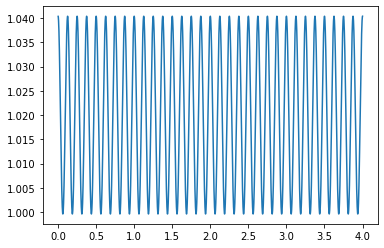

In [14]:
plt.plot(time, I_ext_in)

In [15]:
# I_ext = combine I_ext_ex and I_ext_in
I_ext = np.zeros([N, len(time)])
cnt_ex = 0
cnt_in = 0
for i in range(N):
    if i in inhibitory_indx:
        I_ext[i,:] = I_ext_in
        cnt_in = cnt_in + 1
    else:
        I_ext[i,:] = I_ext_ex[cnt_ex,:]
        cnt_ex = cnt_ex + 1
        

In [16]:
def delta_kronecker(delta_t):
    if delta_t == 0:
        return 1
    else:
        return 0

In [17]:
# compute I_ex and I_in
I_ex = np.zeros([N, len(time)])
I_in = np.zeros([N, len(time)])

t_spike = np.zeros([N, len(time)])

Is = I_ex - I_in

V = np.zeros([N, len(time)])
V[:,0] = Vres

In [18]:
tau_ex = 6/1000
tau_in = 4/1000
tau = 20/1000

In [19]:
# Equ. 3
def integrate_and_fire(V, t_spike_time, t, Is):
    dV = dt*(-V[:,t-1] + Is[:,t-1] + I_ext[:,t-1])/tau
    V[:,t] = V[:,t-1] + dV
    for i in range(N):
        if V[i,t]>theta:
            t_spike_time[i,t] = 1
            V[i,t] = Vres
            
        if i in inhibitory_indx:
            I_in[i,t] = I_in[i,t-1] + dt*(-I_in[i,t-1]/tau_in + s_in()*np.dot(Jij_in[i,:],t_spike_time[:,t-1]))
        else:
            I_ex[i,t] = I_ex[i,t-1] + dt*(-I_ex[i,t-1]/tau_ex + s_ex()*np.dot(Jij_ex[i,:],t_spike_time[:,t-1]))
            
    Is = I_ex - I_in
    
    return V, t_spike_time, Is

In [20]:
for t in range(1,len(time)):
    V, t_spike, Is = integrate_and_fire(V, t_spike, t, Is)
    

In [21]:
t_spike

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

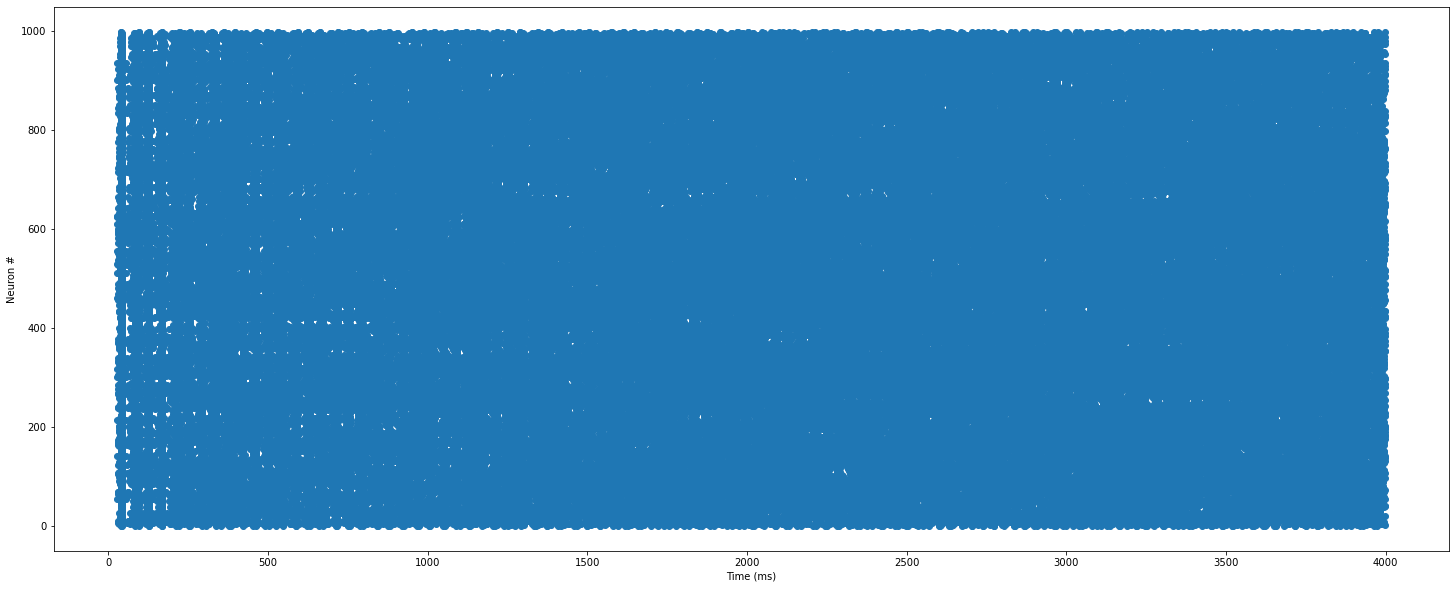

In [22]:
plt.figure(figsize=(25,10))
plt.xlabel('Time (ms)')
plt.ylabel('Neuron #')
plt.scatter(np.where(t_spike==1)[1], np.where(t_spike==1)[0])

In [23]:
np.where(t_spike==1)[0]

array([  0,   0,   0, ..., 999, 999, 999])

In [24]:
np.sum(t_spike==1)

104359